In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df_kolektor = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI_Collection_and_Loss_Reverse_Forecast\data\data_kolektor.csv")
df_kolektor.head(5)

,Unnamed: 0,collector_name,collector_address,collector_number,collector_nik,time_to_collect,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate,collector_zip,collector_rt,collector_rw,collector_birth_place,collector_age,collector_marital_status,collector_gender
0,0,Sean Strong,"Gang Indragiri No. 194\nTebingtinggi, NT 48385",+62 (575) 348-4217,8408042025800377,0,sms or WA,7,14400000,35700000,277706,40.0,48385,1,2,"Kepulauan Bangka Belitung, 29-05-1978",45,Menikah,laki-laki
1,1,Heather Velez,"Gg. Cikutra Timur No. 558\nBanjar, BE 92453",+62-0235-141-1521,7572771410780058,11,panggilan,35,79000000,160500000,22382611,49.0,92453,15,11,"Sumatera Selatan, 17-05-1991",32,Cerai mati,perempuan
2,2,Andrew Murray II,"Jalan Medokan Ayu No. 862\nSurakarta, Kepulaua...",+62 (038) 501 4020,2756328606045296,4,sms or WA,6,7100000,26700000,205389,27.0,13784,6,9,"Sumatera Utara, 22-04-1961",62,Cerai hidup,laki-laki
3,3,Dr. Lee Torres,"Jalan Kapten Muslihat No. 78\nBatam, Nusa Teng...",+62 (0882) 879 3302,1902234843110441,29,datang ke tempat,63,782000000,1395000000,482942548,56.0,37123,19,3,"Sulawesi Selatan, 20-06-1968",55,Cerai mati,perempuan
4,4,Sierra Richards,"Jl. Ciwastra No. 8\nTarakan, Jawa Timur 91406",+62 (031) 513 8460,5968351900599433,22,datang ke tempat,35,346000000,485500000,151035603,71.0,91406,7,10,"Banten, 21-05-1970",53,Menikah,perempuan


In [3]:
df_kolektor.isnull().sum()

Unnamed: 0                  0
collector_name              0
collector_address           0
collector_number            0
collector_nik               0
time_to_collect             0
avg_bill_methods            0
debtor_volume_handled       0
bill_amount_collected       0
total_actual                0
total_cost                  0
success_rate                0
collector_zip               0
collector_rt                0
collector_rw                0
collector_birth_place       0
collector_age               0
collector_marital_status    0
collector_gender            0
dtype: int64

In [4]:
df_kolektor.duplicated().sum()

0

In [5]:
df_kolektor.shape

(1000, 19)

In [6]:
df_kolektor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   collector_name            1000 non-null   object 
 2   collector_address         1000 non-null   object 
 3   collector_number          1000 non-null   object 
 4   collector_nik             1000 non-null   int64  
 5   time_to_collect           1000 non-null   int64  
 6   avg_bill_methods          1000 non-null   object 
 7   debtor_volume_handled     1000 non-null   int64  
 8   bill_amount_collected     1000 non-null   int64  
 9   total_actual              1000 non-null   int64  
 10  total_cost                1000 non-null   int64  
 11  success_rate              1000 non-null   float64
 12  collector_zip             1000 non-null   int64  
 13  collector_rt              1000 non-null   int64  
 14  collector

In [7]:
df_kolektor.drop(labels=["Unnamed: 0"], axis=1, inplace=True)
df_kolektor["avg_bill_methods"] = df_kolektor["avg_bill_methods"].astype("category")

In [8]:
df_kolektor.head(5)

,collector_name,collector_address,collector_number,collector_nik,time_to_collect,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate,collector_zip,collector_rt,collector_rw,collector_birth_place,collector_age,collector_marital_status,collector_gender
0,Sean Strong,"Gang Indragiri No. 194\nTebingtinggi, NT 48385",+62 (575) 348-4217,8408042025800377,0,sms or WA,7,14400000,35700000,277706,40.0,48385,1,2,"Kepulauan Bangka Belitung, 29-05-1978",45,Menikah,laki-laki
1,Heather Velez,"Gg. Cikutra Timur No. 558\nBanjar, BE 92453",+62-0235-141-1521,7572771410780058,11,panggilan,35,79000000,160500000,22382611,49.0,92453,15,11,"Sumatera Selatan, 17-05-1991",32,Cerai mati,perempuan
2,Andrew Murray II,"Jalan Medokan Ayu No. 862\nSurakarta, Kepulaua...",+62 (038) 501 4020,2756328606045296,4,sms or WA,6,7100000,26700000,205389,27.0,13784,6,9,"Sumatera Utara, 22-04-1961",62,Cerai hidup,laki-laki
3,Dr. Lee Torres,"Jalan Kapten Muslihat No. 78\nBatam, Nusa Teng...",+62 (0882) 879 3302,1902234843110441,29,datang ke tempat,63,782000000,1395000000,482942548,56.0,37123,19,3,"Sulawesi Selatan, 20-06-1968",55,Cerai mati,perempuan
4,Sierra Richards,"Jl. Ciwastra No. 8\nTarakan, Jawa Timur 91406",+62 (031) 513 8460,5968351900599433,22,datang ke tempat,35,346000000,485500000,151035603,71.0,91406,7,10,"Banten, 21-05-1970",53,Menikah,perempuan


In [9]:
df_kolektor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   collector_name            1000 non-null   object  
 1   collector_address         1000 non-null   object  
 2   collector_number          1000 non-null   object  
 3   collector_nik             1000 non-null   int64   
 4   time_to_collect           1000 non-null   int64   
 5   avg_bill_methods          1000 non-null   category
 6   debtor_volume_handled     1000 non-null   int64   
 7   bill_amount_collected     1000 non-null   int64   
 8   total_actual              1000 non-null   int64   
 9   total_cost                1000 non-null   int64   
 10  success_rate              1000 non-null   float64 
 11  collector_zip             1000 non-null   int64   
 12  collector_rt              1000 non-null   int64   
 13  collector_rw              1000 non-null   int64  

In [10]:
df_kolektor.describe().T

,count,mean,std,min,25%,50%,75%,max
collector_nik,1000.0,5.569169e+15,2.630195e+15,1.039335e+15,3.313946e+15,5.613501e+15,7.943895e+15,9.999069e+15
time_to_collect,1000.0,1.466600e+01,8.677427e+00,0.000000e+00,7.000000e+00,1.500000e+01,2.200000e+01,2.900000e+01
debtor_volume_handled,1000.0,3.709800e+01,1.766495e+01,1.000000e+00,2.600000e+01,3.800000e+01,4.900000e+01,6.900000e+01
bill_amount_collected,1000.0,3.011143e+08,3.363630e+08,4.000000e+05,5.917500e+07,1.820000e+08,4.240000e+08,2.052000e+09
total_actual,1000.0,5.612231e+08,5.279823e+08,9.000000e+05,1.253000e+08,4.055000e+08,8.355000e+08,2.346000e+09
total_cost,1000.0,1.396331e+08,1.666005e+08,2.526300e+04,1.928856e+06,6.221563e+07,2.470647e+08,6.780412e+08
success_rate,1000.0,5.649300e+01,2.645551e+01,6.000000e+00,3.500000e+01,5.600000e+01,7.900000e+01,1.000000e+02
collector_zip,1000.0,5.128274e+04,2.885704e+04,2.700000e+02,2.698575e+04,5.203100e+04,7.630075e+04,9.995100e+04
collector_rt,1000.0,1.057500e+01,5.757736e+00,1.000000e+00,6.000000e+00,1.100000e+01,1.600000e+01,2.000000e+01
collector_rw,1000.0,1.067500e+01,5.700339e+00,1.000000e+00,6.000000e+00,1.100000e+01,1.600000e+01,2.000000e+01


In [11]:
df_kolektor.describe(exclude="number").T

,count,unique,top,freq
collector_name,1000,1000,Sean Strong,1
collector_address,1000,1000,"Gang Indragiri No. 194\nTebingtinggi, NT 48385",1
collector_number,1000,1000,+62 (575) 348-4217,1
avg_bill_methods,1000,4,datang ke tempat,481
collector_birth_place,1000,999,"Sulawesi Tengah, 05-07-1977",2
collector_marital_status,1000,4,Menikah,257
collector_gender,1000,2,perempuan,516


In [12]:
bill_methods = LabelEncoder().fit(df_kolektor["avg_bill_methods"])
mart = LabelEncoder().fit(df_kolektor["collector_marital_status"])
gender = LabelEncoder().fit(df_kolektor["collector_gender"])
df_kolektor.drop(["collector_name", "collector_address", "collector_number", "collector_nik", "collector_zip",
                  "collector_rt", "collector_rw", "collector_birth_place"], axis=1, inplace=True)
df_kolektor["avg_bill_methods"] = bill_methods.transform(df_kolektor["avg_bill_methods"])
df_kolektor["collector_marital_status"] = mart.transform(df_kolektor["collector_marital_status"])
df_kolektor["collector_gender"] = gender.transform(df_kolektor["collector_gender"])
df_kolektor.head(5)

,time_to_collect,avg_bill_methods,debtor_volume_handled,bill_amount_collected,total_actual,total_cost,success_rate,collector_age,collector_marital_status,collector_gender
0,0,2,7,14400000,35700000,277706,40.0,45,3,0
1,11,1,35,79000000,160500000,22382611,49.0,32,2,1
2,4,2,6,7100000,26700000,205389,27.0,62,1,0
3,29,0,63,782000000,1395000000,482942548,56.0,55,2,1
4,22,0,35,346000000,485500000,151035603,71.0,53,3,1


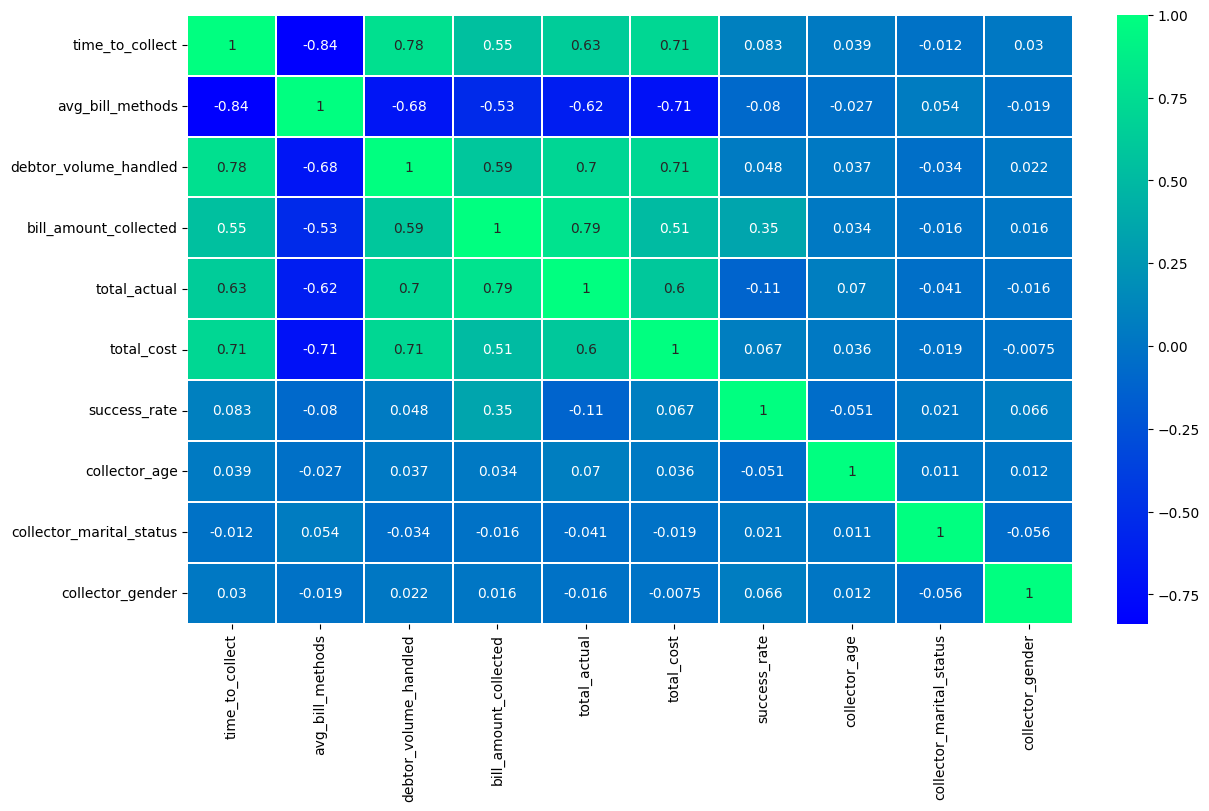

In [13]:
fig, ax = plt.subplots(figsize=(12, 8), layout="constrained")
sns.heatmap(data=df_kolektor.corr(), linecolor="white", linewidths=.2, annot=True, cmap="winter", ax=ax)
plt.show()

In [14]:
bill_method = np.unique(bill_methods.inverse_transform(df_kolektor["avg_bill_methods"]))
bill_method2 = np.unique(bill_methods.transform(bill_method))
print({i: j for i, j in zip(bill_method, bill_method2)})

{'datang ke tempat': 0, 'panggilan': 1, 'sms or WA': 2, 'surat panggilan': 3}


In [15]:
df_kolektor["avg_bill_methods"] = bill_methods.inverse_transform(df_kolektor["avg_bill_methods"])
df_kolektor["collector_gender"] = gender.inverse_transform(df_kolektor["collector_gender"])
df_kolektor["collector_marital_status"] = mart.inverse_transform(df_kolektor["collector_marital_status"])

In [16]:
# for i in range(len(df)):
    

In [17]:
df_kolektor.to_csv("kolektor.csv")